# Markov Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rand_unit():
    n = np.random.random_sample()
    if n > 0.5: return 1
    else: return -1

In [3]:
alpha = 5
beta = 0.5
N = 100

In [4]:
w_t = [rand_unit() for _ in range(N)]

In [47]:
#Puisque M varie pour pas tout recalculer à chaque fois on peut faire une matrice X_t assez grande dès le début
max_alpha = 100
M_max = max_alpha*N

In [48]:
# Matrix whose rows are samples
X_t = np.random.normal(size=(M_max, N))

In [49]:
# Class labels
y_t = [int(np.sign(X_t[i].dot(w_t))) for i in range(M_max)]

In [50]:
#On tronque X_t et y_t pour garder que M valeurs mais je pense qu'il faut changer ça en mélangeant l'ordre à chaque fois
#Ou alors recréer la matrice X_t à chaque fois qu'on fait tourner metro_chain?
def compute_energy(w, M):
    v = np.sign(np.dot(X_t[:M], w)) - y_t[:M]
    return np.vdot(v, v)/2

In [60]:
def metro_chain(alpha, beta, N, max_iters=None, energy_stop=None, verbose=False):
    M = int(alpha * N)
    # intialization
    
    current_w = [rand_unit() for _ in range(N)]
    current_energy = compute_energy(current_w, M)
    
    energy = []
    energy.append(current_energy)
    
    counter = 0
    
    if max_iters == None:
        max_iters = np.inf
    if energy_stop == None:
        energy_stop = -1
    
    while current_energy > energy_stop and counter < max_iters:
        current_energy = compute_energy(current_w, M)
        
        counter += 1
        if verbose and counter % 100 == 0:
            print('Iteration {} and energy : {}'.format(counter, current_energy))
        
        # pick coordinate at random
        coord = np.random.randint(0, high=N)
        
        # flip this coordinate
        new_w = current_w.copy()
        new_w[coord] = -new_w[coord]
        
        # decide if new state is accepted 
        new_energy = compute_energy(new_w, M)
        a = np.exp(- beta * (new_energy - current_energy))
        
        
        #J'ai mis les continue en commentaire (il servent à rien non?)
        #Et j'ai rajouté energy.append(current_energy) dans le deuxième else
        if a >= 1:
            current_w = new_w
            energy.append(new_energy)
            #continue
        else:
            r = np.random.random_sample()
            if r < a:
                current_w = new_w
                energy.append(new_energy)
                #continue
            else:
                energy.append(current_energy)
                #continue
                
    return current_w, energy

In [17]:
alpha=5
beta=0.5
N=100

In [70]:
def get_energy(energies, num_iteration=10):
    n = np.max([len(i) for i in energies])
    energy = []
    for i in range(n):
        tmp = 0
        counter = 0
        for k in range(num_iteration):
            if i < len(energies[k]):
                tmp += energies[k][i]
                counter += 1

        energy.append(tmp/counter)
    return energy
    
def get_mean_energy(alpha, beta, N, max_iters=100, verbose=False, num_iteration=10):
    energies = []
    for _ in range(num_iteration):
        _, tmp = metro_chain(alpha=alpha, beta=beta, N=N, max_iters=max_iters, verbose=verbose)
        energies.append(tmp)
        #print(len(tmp))
    energy = get_energy(energies, num_iteration=num_iteration)
    return energy

In [71]:
energy1 = get_mean_energy(alpha=1, beta=0.5, N=100, max_iters=500, num_iteration=100)

In [72]:
energy5 = get_mean_energy(alpha=5, beta=0.5, N=100, max_iters=500, num_iteration=100)

In [73]:
energy10 = get_mean_energy(alpha=10, beta=0.5, N=100, max_iters=500, num_iteration=100)

In [74]:
energy100 = get_mean_energy(alpha=100, beta=0.5, N=100, max_iters=500, num_iteration=100)

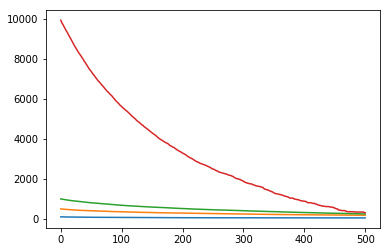

In [75]:
plt.plot(energy1)
plt.plot(energy5)
plt.plot(energy10)
plt.plot(energy100)
plt.show()

#Puisque alpha varie et que l'énergie est pas normalisée elle est beaucoup plus élevée quand alpha est grand. Mais
#dans la question ils demandent pas de la normaliser

## Question 2

In [54]:
beta = 0.5
T = 500
alphas = np.arange(1, 100)

In [66]:
def normalized_energy(alpha, beta, run_count=10):
    s = 0
    for i in range(run_count):
        w, _ = metro_chain(alpha=alpha, beta=beta, N=N, max_iters=T)
        s += compute_energy(w, alpha*N)/(alpha*N)
    return s/run_count

In [67]:
energies = [normalized_energy(alpha, beta) for alpha in alphas]

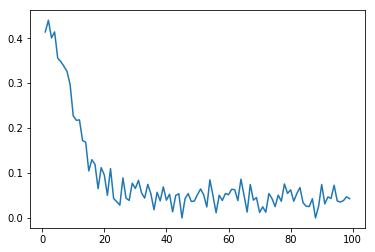

In [68]:
plt.plot(alphas, energies)
plt.show()

In [ ]:
def overlap(w):
    return np.vdot(w, w_t)/N